In [12]:
import sys

sys.path.append('../')

import os
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from utils.data import load_mat
from utils.visualization import *

data_path = '../data/'
results_path = '../results/'

### Load Images

In [13]:
rec_das_phantom = load_mat(os.path.join(results_path, 'das_phantom.mat'))
rec_apact_phantom = load_mat(os.path.join(results_path, 'apact_phantom.mat'))
rec_wiener_phantom = load_mat(os.path.join(results_path, 'sb_wiener_phantom.mat'))    
rec_das_invivo = load_mat(os.path.join(results_path, 'das_invivo.mat'))
rec_apact_invivo = load_mat(os.path.join(results_path, 'apact_invivo.mat'))
rec_wiener_invivo = load_mat(os.path.join(results_path, 'sb_wiener_invivo.mat'))   

In [14]:
[rec_das_phantom, rec_apact_phantom, rec_wiener_phantom] = \
    [standardize(img) for img in [rec_das_phantom, rec_apact_phantom, rec_wiener_phantom]]
[rec_das_invivo, rec_apact_invivo, rec_wiener_invivo] = \
    [normalize(img) for img in [rec_das_invivo, rec_apact_invivo, rec_wiener_invivo]]

### Create Figure

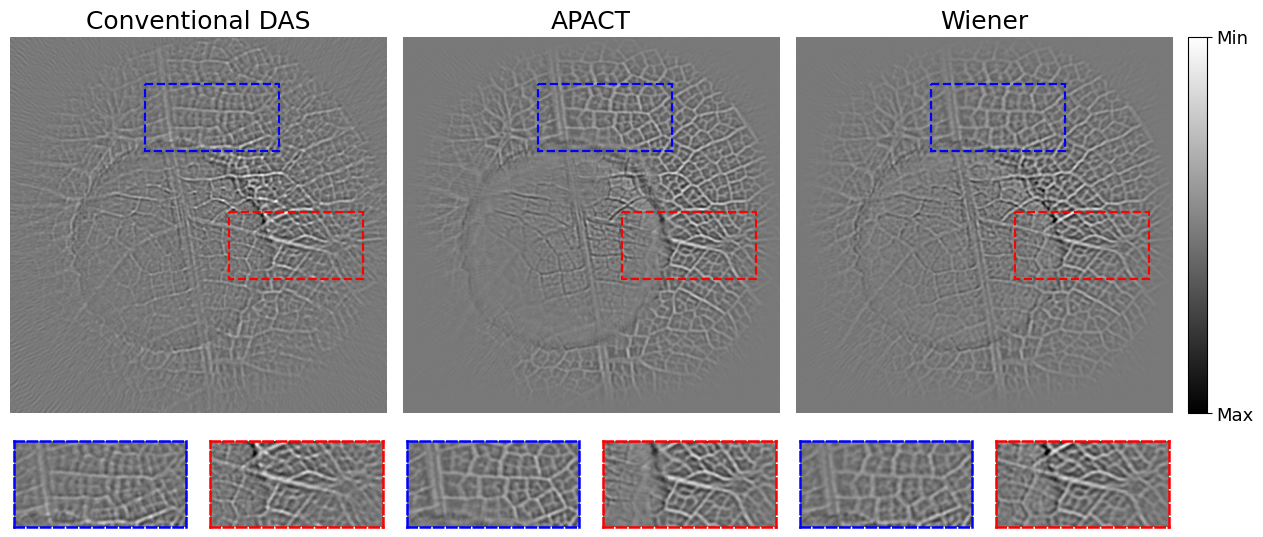

In [18]:
patches = [(70, 200, 100, 200, 'blue'), (260, 325, 100, 200, 'red')]

fig = plt.figure(figsize=(15, 6.5))
gs = gridspec.GridSpec(5, 12)
norm = matplotlib.colors.Normalize(vmax=10, vmin=-9)
for idx, (rec_full, method) in enumerate(zip([rec_das_phantom, rec_apact_phantom, rec_wiener_phantom], ['Conventional DAS', 'APACT', 'Wiener'])):
    ax = plt.subplot(gs[0:4,idx*4:(idx+1)*4])
    plt.imshow(rec_full, cmap='gray', norm=norm)
    plt.title(method, fontsize=18)
    plt.axis('off')
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[4:5,idx*4+k*2:idx*4+(k+1)*2])
        plt.imshow(rec_full[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
cb = plt.colorbar(cax=cax)
cb.set_ticks([10, -9])
cb.set_ticklabels(['Min', 'Max'], fontsize=13)

plt.savefig('figure_phantom.png', bbox_inches='tight', dpi=300)

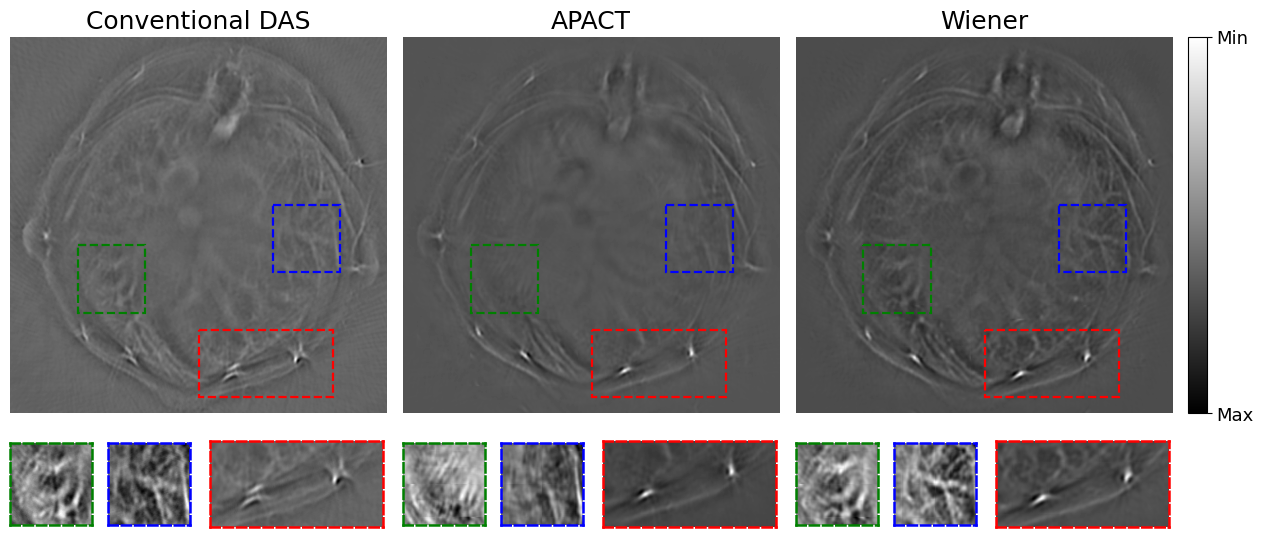

In [17]:
patches = [(310, 100, 100, 100, 'green'), (250, 390, 100, 100,'blue'), (435, 280, 100, 200, 'red')]

fig = plt.figure(figsize=(15, 6.5))
gs = gridspec.GridSpec(5, 12)
norm = matplotlib.colors.Normalize(vmax=1, vmin=0)
for idx, (rec_full, method) in enumerate(zip([rec_das_invivo, rec_apact_invivo, rec_wiener_invivo], ['Conventional DAS', 'APACT', 'Wiener'])):
    ax = plt.subplot(gs[0:4,idx*4:(idx+1)*4])
    plt.imshow(rec_full, cmap='gray', norm=norm)
    plt.title(method, fontsize=18)
    plt.axis('off')
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[4:5,idx*4+k:idx*4+k+1+(k==2)])
        plt.imshow(rec_full[x:x+h, y:y+w], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')
        
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
cb = plt.colorbar(cax=cax)
cb.set_ticks([1, 0])
cb.set_ticklabels(['Min', 'Max'], fontsize=13)

plt.savefig('figure_invivo.png', bbox_inches='tight', dpi=300)